## **Blinkit Analysis Project**

### **Import Labraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### **load data using pandas**

In [2]:
df = pd.read_csv('blinkit_data.csv')
# df.head()

df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **Understanting Data Step**

In [3]:
# df.columns
print("shape of data ",df.shape )  #rows and columns

shape of data  (8523, 12)


In [4]:
# df.info()

In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [6]:
# df.count()

In [7]:
df['Sales'].sum()

1201681.4808

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Data Cleaning**

### **Change the inconsistenance data**

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg':'Regular'
                                                        })

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#  **Business Requirements**

### **KPI's Requirement** 

In [12]:
# Total Sales
total_sales = df['Sales'].sum()
print("Total Sales ",total_sales)
# Total Average
Average_sales = df['Sales'].mean()
print("Averge Sales ",Average_sales)

# Number of items sold 
no_of_sold = df['Sales'].count()
print("Number of items Sold",no_of_sold)

# Average Rating 
Average_Rating = df['Rating'].mean()
print("Average Rating",Average_Rating)

# Display Format idea 
print("-------------------------------------------- Display KPI's Format ------------------------------------------------")

print(f"Total Sales : ${total_sales:,.0f}")
print(f"Average Sales: ${Average_sales:,.0f}")
print(f"Number of items Sold: ${no_of_sold:,.0f}")
print(f"Average Rating : ${Average_Rating:,.0f}")

Total Sales  1201681.4808
Averge Sales  140.9927819781767
Number of items Sold 8523
Average Rating 3.965857092573038
-------------------------------------------- Display KPI's Format ------------------------------------------------
Total Sales : $1,201,681
Average Sales: $141
Number of items Sold: $8,523
Average Rating : $4


In [13]:
# Total Average
df['Sales'].mean()

140.9927819781767

### **Charts Requirement** 

In [14]:
df.columns 

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## **Total Sales by Fat Content**

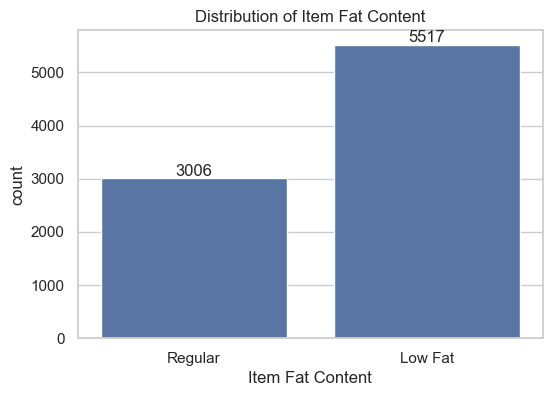

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Item Fat Content')
plt.title('Distribution of Item Fat Content')

# Add labels using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [18]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
sales_by_fat

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

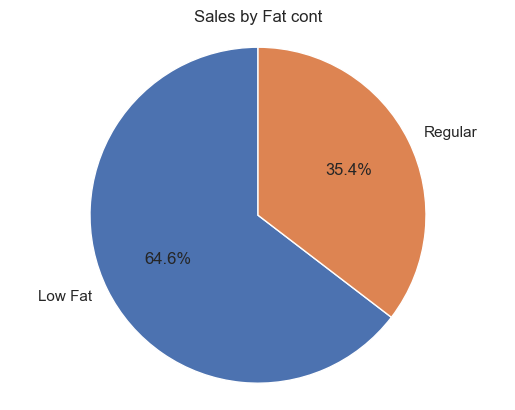

In [19]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.title('Sales by Fat cont')
plt.axis('equal')
plt.show()

## **Total Sales by Item Types**

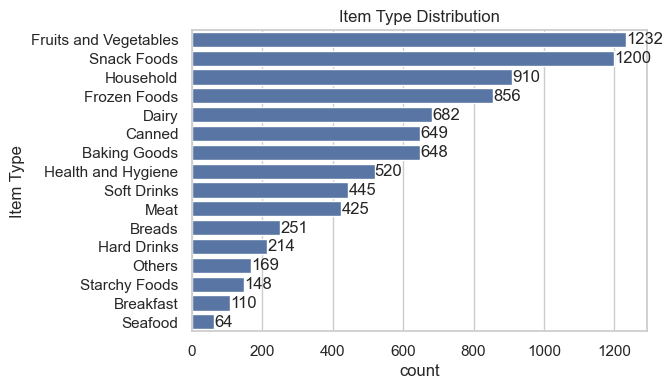

In [26]:
# Set up the style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 18))
# Subplot 3 – Item Type
plt.subplot(4, 3, 3)
ax3 = sns.countplot(data=df, y='Item Type', order=df['Item Type'].value_counts().index)
plt.title('Item Type Distribution')

for bar_container in ax3.containers:
    ax3.bar_label(bar_container)

In [27]:
# Or Visualizing using the Grouping Method 

In [28]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum()
sales_by_item_type

Item Type
Baking Goods              81894.7364
Breads                    35379.1198
Breakfast                 15596.6966
Canned                    90706.7270
Dairy                    101276.4596
Frozen Foods             118558.8814
Fruits and Vegetables    178124.0810
Hard Drinks               29334.6766
Health and Hygiene        68025.8388
Household                135976.5254
Meat                      59449.8638
Others                    22451.8916
Seafood                    9077.8700
Snack Foods              175433.9204
Soft Drinks               58514.1650
Starchy Foods             21880.0274
Name: Sales, dtype: float64

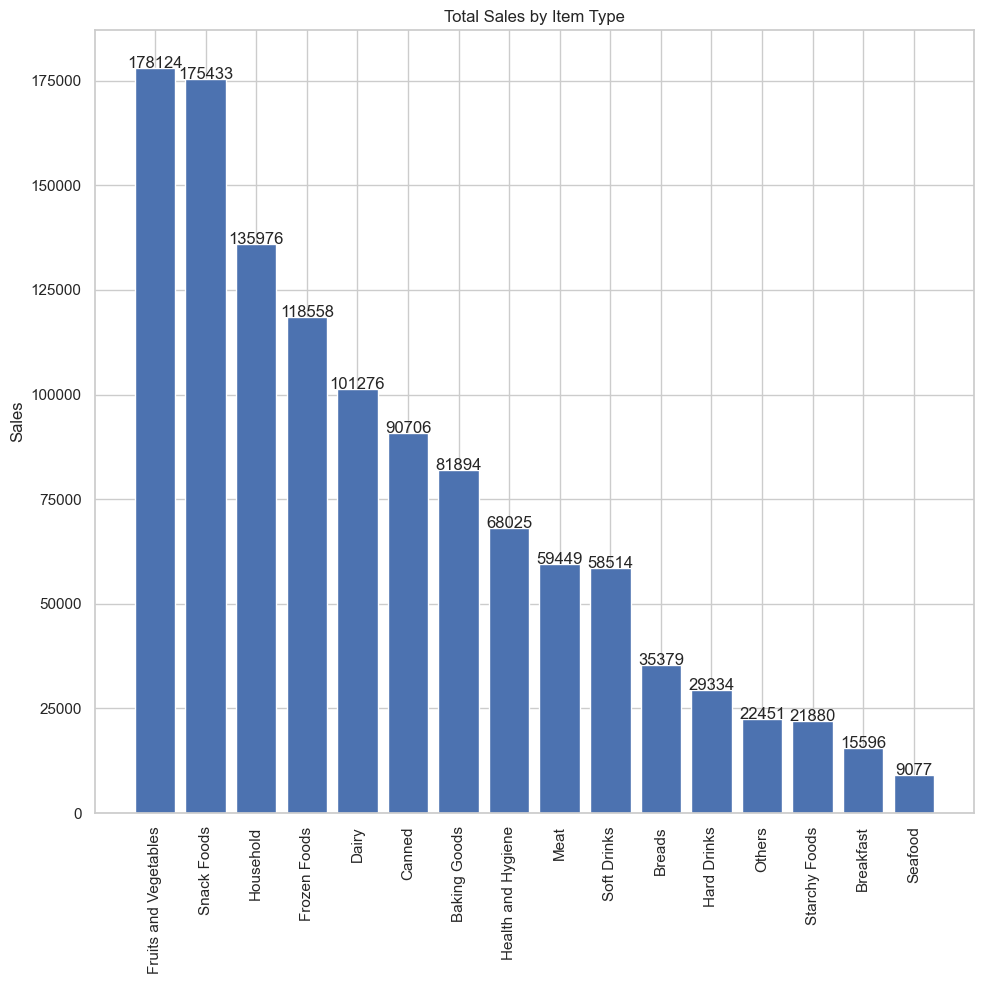

In [31]:
import matplotlib.pyplot as plt

# Group and sort
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 10))
bar = plt.bar(sales_by_item_type.index, sales_by_item_type.values)

# Get current axis
ax = plt.gca()

# Add labels on bars
for rect in bar:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f'{int(height)}', ha='center')

# Title and labels
plt.title('Total Sales by Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


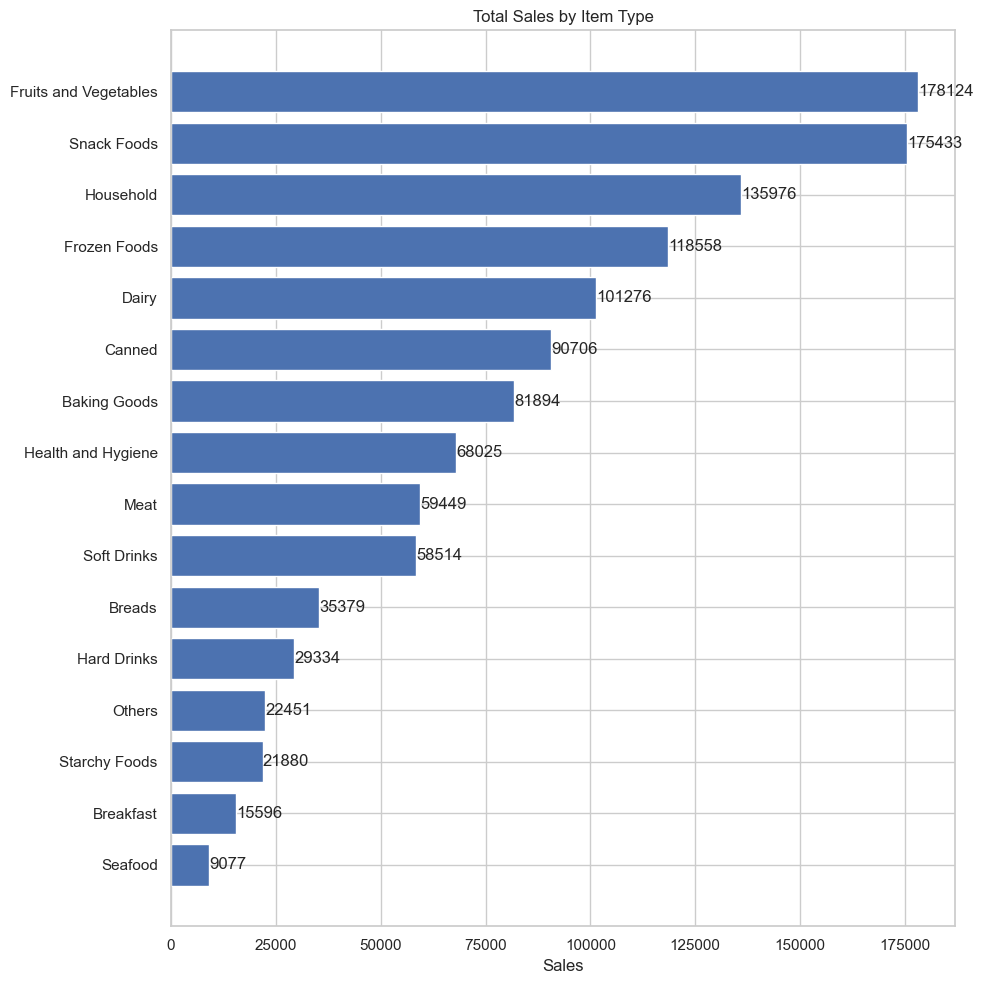

In [34]:
import matplotlib.pyplot as plt

# Group and sort
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(10, 10))
bar = plt.barh(sales_by_item_type.index, sales_by_item_type.values)

# Get current axis
ax = plt.gca()

# Add labels on bars
for rect in bar:
    width = rect.get_width()
    ax.text(width + 1, rect.get_y() + rect.get_height() / 2, f'{int(width)}', va='center')

# Title and labels
plt.title('Total Sales by Item Type')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()


## **Fat Content by Outlet for Total Sales**

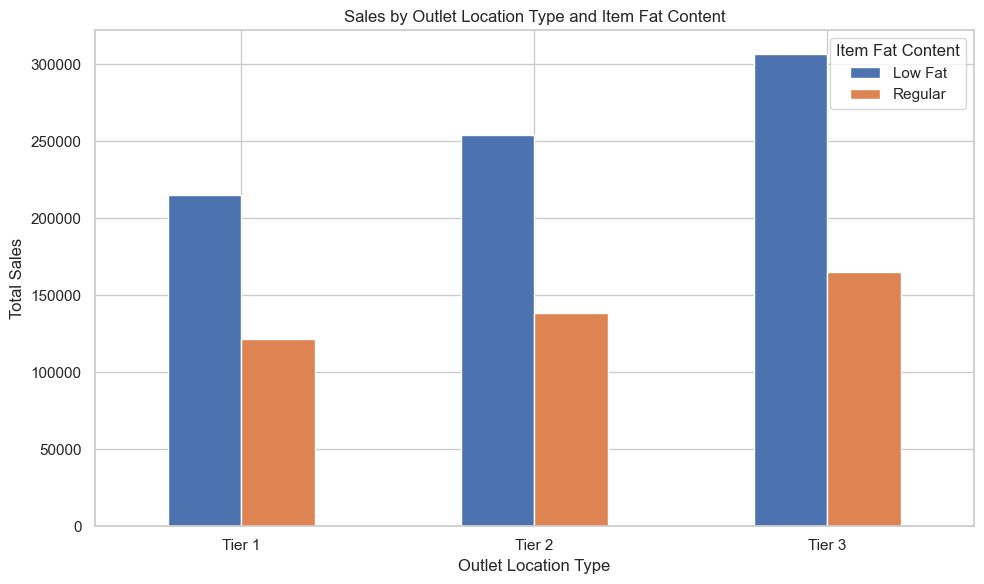

In [47]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped

import matplotlib.pyplot as plt

# Plotting
ax = grouped.plot(kind='bar', figsize=(10, 6))

# Title and labels
plt.title('Sales by Outlet Location Type and Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


In [37]:
df.column

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

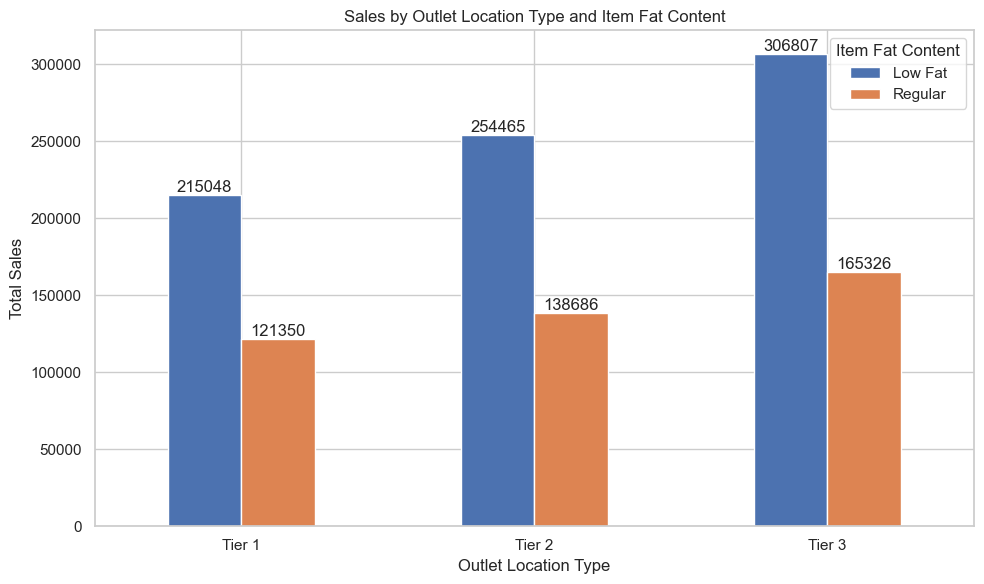

In [48]:
import matplotlib.pyplot as plt

# Grouped Data
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()

# Plotting
ax = grouped.plot(kind='bar', figsize=(10, 6))

# Add labels on each bar
for bar_container in ax.containers:
    ax.bar_label(bar_container, fmt='%.0f')  # Remove decimals, or use '%.2f' if needed

# Title and labels
plt.title('Sales by Outlet Location Type and Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Item Fat Content')
plt.tight_layout()

# Show plot
plt.show()


# Sales by  Outlet Establishment Year

In [52]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum()
sales_by_year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64

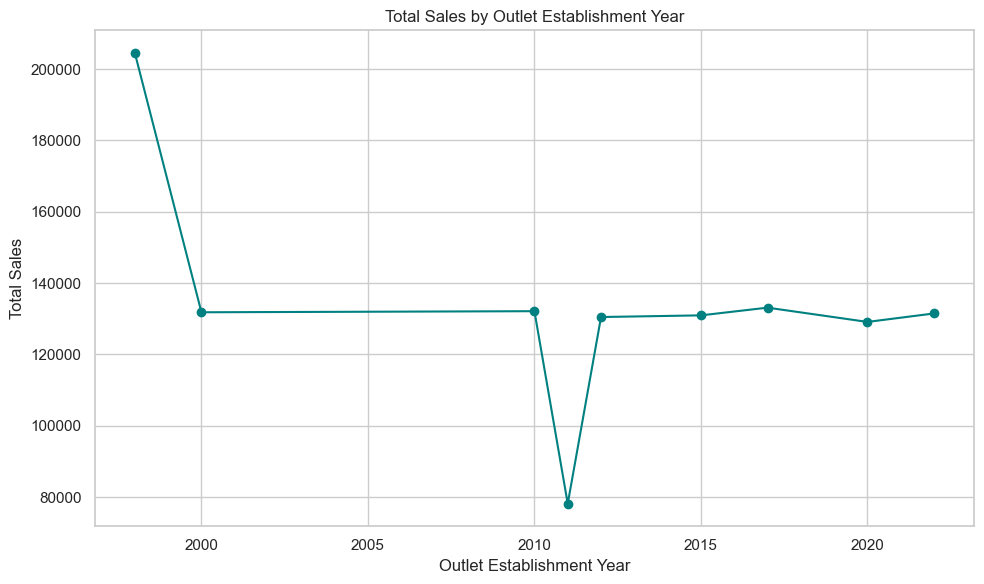

In [57]:
import matplotlib.pyplot as plt

# Group sales by year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='teal')
# add the labels sec
# for x, y in zip(sales_by_year.index, sales_by_year.values):
#     plt.text(x, y + 1000, f'{int(y)}', ha='center')

# Labels and title
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# End the Project 